In [91]:
# Q5_3
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


def Q5_3(num, den, sys_num, w_log_range=[-1, 1]):
    # create LTI system
    lti = signal.TransferFunction(num, den)
    fig, axs = plt.subplots(2, 2, figsize=(8, 5.5))
    fig.suptitle(f"$H_{sys_num}(s)$")

    # zero-pole diagram
    zeros = lti.zeros
    poles = lti.poles
    axs[0,0].scatter(np.real(zeros), np.imag(zeros), marker="o", color="blue", label="Zeros")
    axs[0,0].scatter(np.real(poles), np.imag(poles), marker="x", color="red", label="Poles")
    axs[0,0].set_title("The zero-pole diagram")
    axs[0,0].set_xlabel("Real")
    axs[0,0].set_ylabel("Imaginary")
    axs[0,0].axvline(x=0, color="black", linestyle="--", linewidth=0.8)
    axs[0,0].axhline(y=0, color="black", linestyle="--", linewidth=0.8)
    axs[0,0].legend()

    # Impulse response
    t2, y2 = signal.impulse(lti)
    axs[1,0].plot(t2, y2)
    axs[1,0].set_title("The impulse response $h(t)$")

    # magnotude response
    w = np.logspace(w_log_range[0], w_log_range[1], 1000)
    w, h = signal.freqresp(lti, w)

    # magnitude response
    amps = np.abs(h)
    axs[0,1].semilogx(w, amps)
    axs[0,1].set_title("Amplitude Response")

    # phase response
    phas = np.angle(h)
    axs[1,1].semilogx(w, phas)
    axs[1,1].set_title("Phase Response")
    axs[1,1].set_xlabel("$log(w)$")


    plt.tight_layout()
    plt.show()

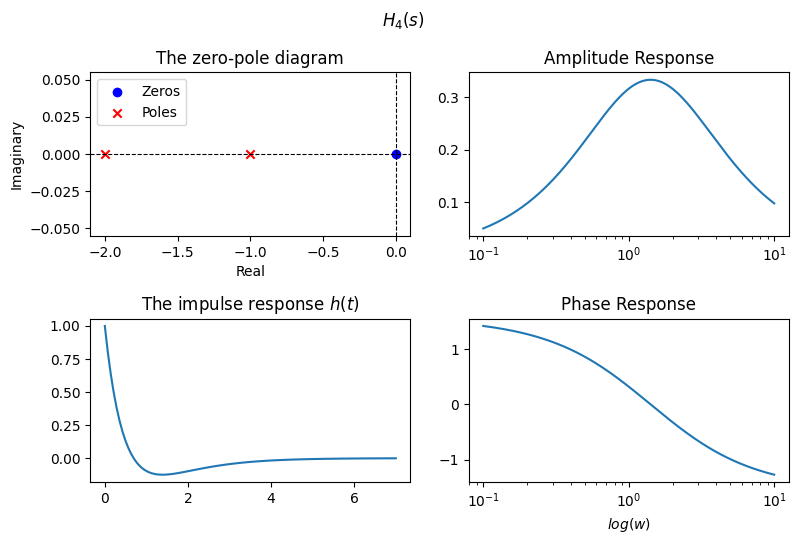

In [92]:
# Test 4
num4 = [1, 0]
den4 = [1, 3, 2]

Q5_3(num4, den4, sys_num=4)

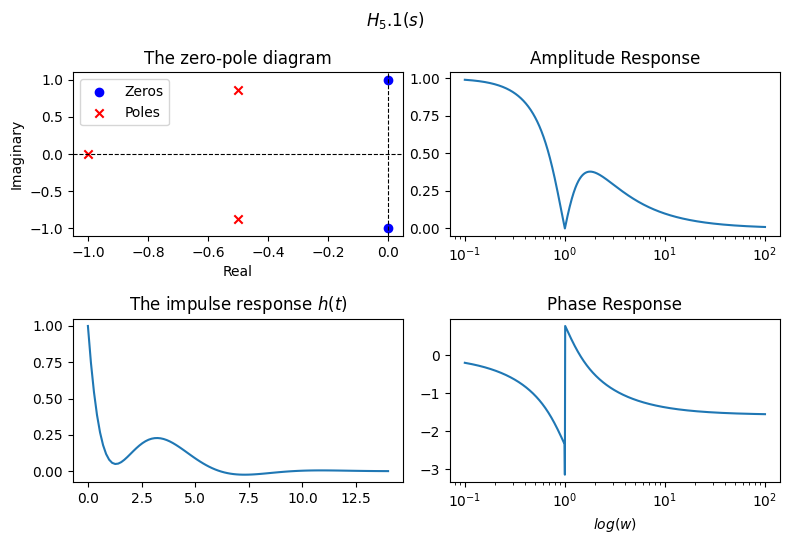

In [93]:
# test 5
a = 1
num5 = [1/a, 0, 1]
den5 = [1, 2, 2, 1]

Q5_3(num5, den5, sys_num=5.1, w_log_range=[-1, 2])

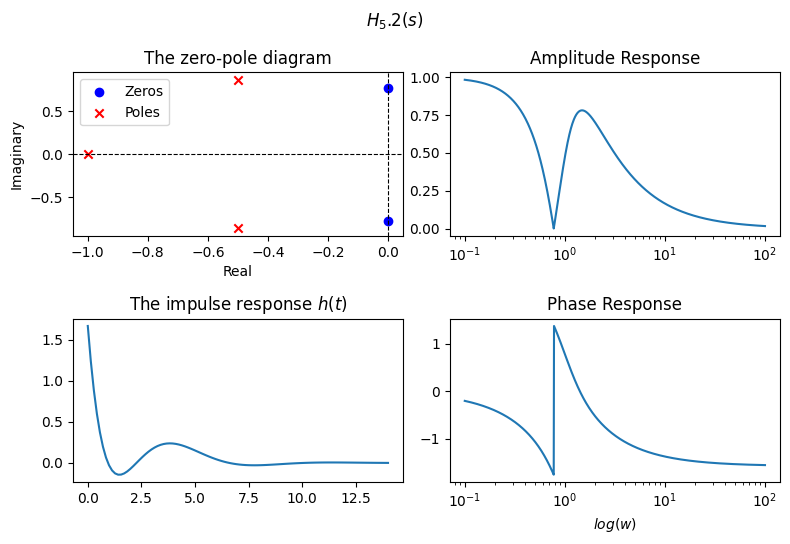

In [94]:
a = 0.6
num5 = [1/a, 0, 1]
den5 = [1, 2, 2, 1]

Q5_3(num5, den5, sys_num=5.2, w_log_range=[-1, 2])

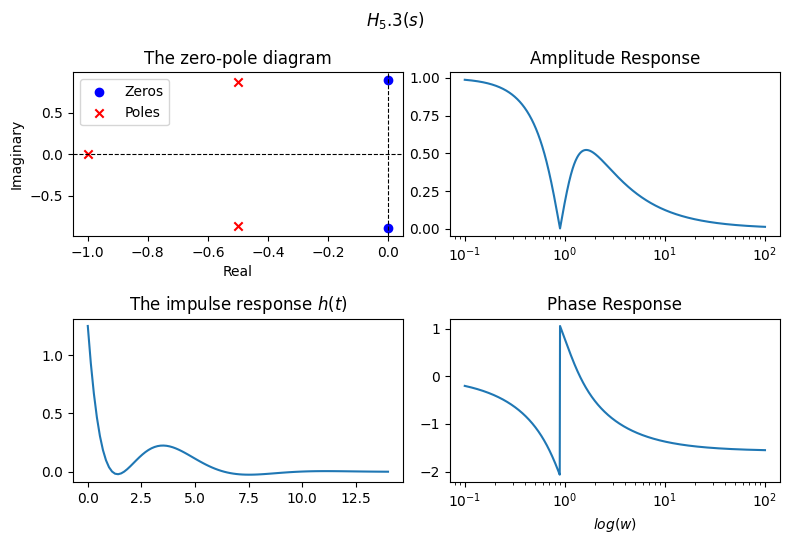

In [95]:
a = 0.8
num5 = [1/a, 0, 1]
den5 = [1, 2, 2, 1]

Q5_3(num5, den5, sys_num=5.3, w_log_range=[-1, 2])

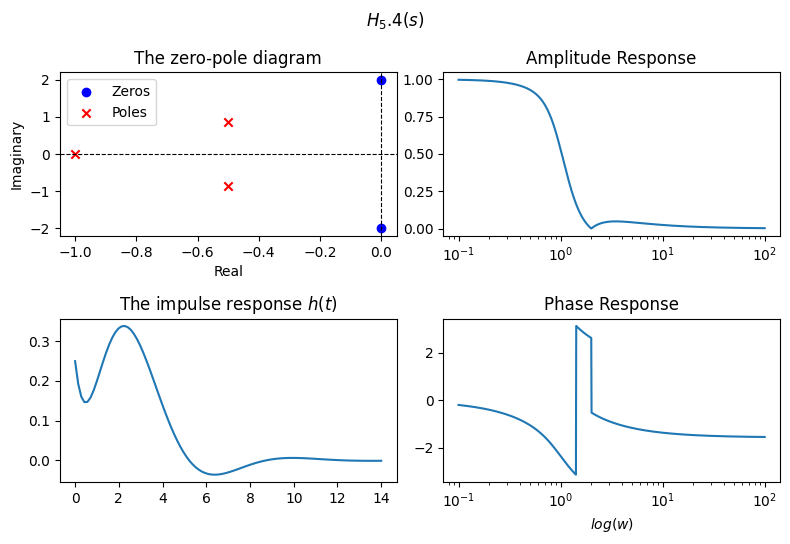

In [96]:
a = 4
num5 = [1/a, 0, 1]
den5 = [1, 2, 2, 1]

Q5_3(num5, den5, sys_num=5.4, w_log_range=[-1, 2])

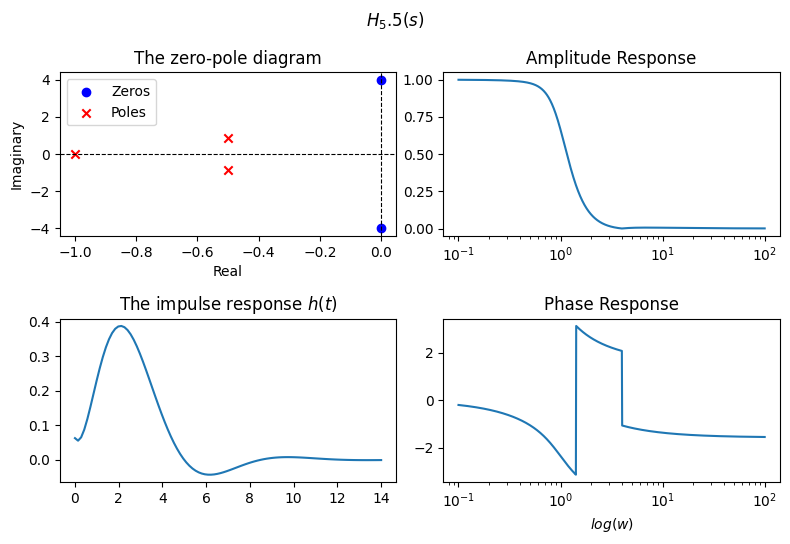

In [99]:
a = 16
num5 = [1/a, 0, 1]
den5 = [1, 2, 2, 1]

Q5_3(num5, den5, sys_num=5.5, w_log_range=[-1, 2])

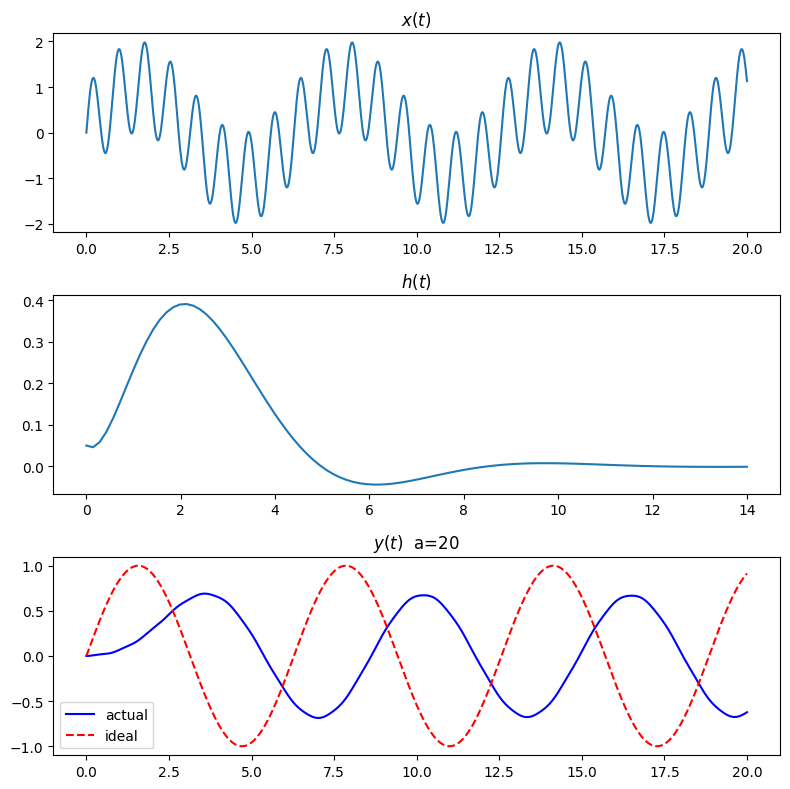

In [140]:
# Test 6 : Q5_6
a = 20
num5 = [1/a, 0, 1]
den5 = [1, 2, 2, 1]
sys = signal.TransferFunction(num5, den5)

fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# x(t)
t1 = np.linspace(0, 20, 1000)
x = np.sin(t1) + np.sin(8*t1)
axs[0].plot(t1, x)
axs[0].set_title("$x(t)$")

# h(t)
t2, h = signal.impulse(sys)
axs[1].plot(t2, h)
axs[1].set_title("$h(t)$")

# y(t)
t3, y, _ = signal.lsim(sys, x, t1)
axs[2].plot(t3, y, "b", label="actual")
y_ideal = np.sin(t3)
axs[2].plot(t3, y_ideal, "r--", label="ideal")
axs[2].set_title(f"$y(t)$  a={a}")
axs[2].legend()


plt.tight_layout()
plt.show()

In [150]:
# Test 7
from sympy import symbols, exp, Heaviside, laplace_transform, inverse_laplace_transform


t, s = symbols("t s")
x = exp(-4*t)*Heaviside(t)

H = (s + 5) / (s**3 + 6*s**2 + 11*s + 6)
X = laplace_transform(x, t, s)[0]
Y = H*X

y = inverse_laplace_transform(Y, s, t)
y

(4*exp(3*t) - 9*exp(2*t) + 6*exp(t) - 1)*exp(-4*t)*Heaviside(t)/6